In [64]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_excel(r"C:\Users\S.Joshi\Desktop\Nipun\data.xlsx")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [4]:
data.shape

(9551, 19)

# Checking for null values

In [10]:
data.isnull().sum()

# 1 restaurant name is missing and 9 values are missing in Cuisines

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
# Dropping all missing values
df = data.dropna()
df.shape

(9541, 19)

In [18]:
df['Restaurant Name'].nunique()
# There are total 9541 records but only 7445 unique restaurant names, i.e there are some duplicates

7436

In [15]:
df['Cuisines']

0                                    Italian, Continental
1                              Asian, Indonesian, Western
2                                         Sushi, Japanese
3                                                Japanese
4                                         French, Western
                              ...                        
9546                     Chinese, North Indian, Fast Food
9547                         Indian, Chinese, Continental
9548    Cafe, Continental, Desserts, Ice Cream, Italia...
9549                                          Street Food
9550                                Chinese, North Indian
Name: Cuisines, Length: 9541, dtype: object

In [147]:
# Dropping duplicates only from the Restaurant Name column
# All other columns are not considered while dropping duplicates as many restaurant may have same features
df1 = df.drop_duplicates(subset = 'Restaurant Name')

In [148]:
df1.shape

(7436, 19)

In [149]:
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


# EXPLORATORY DATA ANALYSIS

## a. The cities with maximum and minimum number of restaurants

In [157]:
city_count = df1['City'].value_counts().reset_index()
city_count.columns = ['City','Count']
city_count

# New Delhi has maximum number of restaurants- 5473
# Cochrane has only 1 restaurant

,City,Count
0,New Delhi,4139
1,Gurgaon,890
2,Noida,748
3,Faridabad,214
4,Auckland,20
...,...,...
134,Tangerang,1
135,Panchkula,1
136,Dicky Beach,1
137,Clatskanie,1


<AxesSubplot:xlabel='City'>

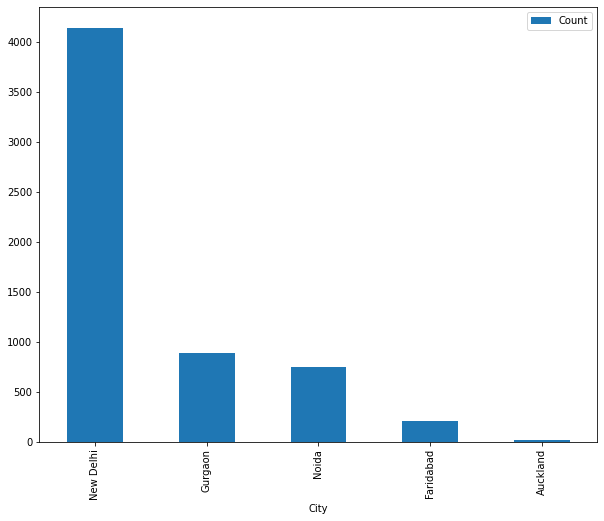

In [158]:
# Top 5 cities having maximum number of restaurants
city_count.head(5).plot(kind = 'bar', x = 'City', y = 'Count')

## b. Distribution of ratings

## c. Franchise with the most national presence

In [159]:
df11 = data.groupby(['Restaurant Name','City'])['Restaurant Name'].count()
df11.sort_values(ascending = False)

Restaurant Name      City     
Cafe Coffee Day      New Delhi    57
Domino's Pizza       New Delhi    55
Subway               New Delhi    38
Green Chick Chop     New Delhi    37
McDonald's           New Delhi    33
                                  ..
Patiala Shahi Soups  New Delhi     1
Patna Roll Center    New Delhi     1
Paul's Homemade      New Delhi     1
Pauls Food           New Delhi     1
12212                Nashik        1
Name: Restaurant Name, Length: 7973, dtype: int64

In [160]:
df2 = data['Restaurant Name'].value_counts().reset_index()
df2.columns = ['Restaurant Name','Count']
df2.head()

,Restaurant Name,Count
0,Cafe Coffee Day,83
1,Domino's Pizza,79
2,Subway,63
3,Green Chick Chop,51
4,McDonald's,48


<AxesSubplot:xlabel='Restaurant Name'>

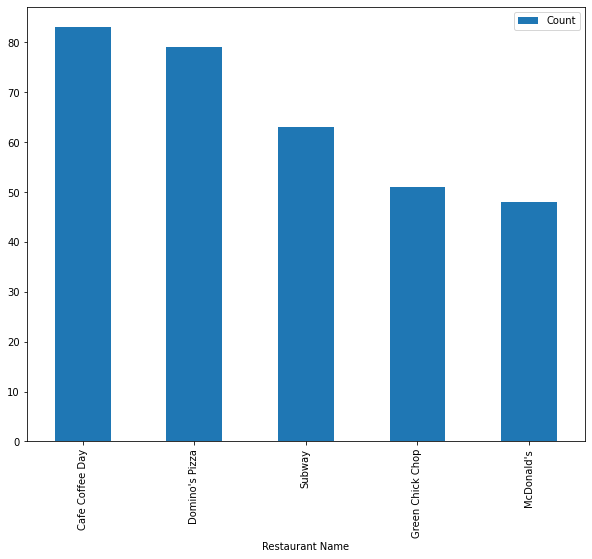

In [161]:
df2.head().plot(kind = 'bar', x = 'Restaurant Name', y= 'Count')

## d. Ratio between restaurants that allow table booking vs that do not allow table booking

In [162]:
df_table = df1['Has Table booking'].value_counts()
df_table

No     6436
Yes    1000
Name: Has Table booking, dtype: int64

In [163]:
np.round((df_table[1]/df_table[0]),4)

0.1554

## e. Percentage of restaurants providing online delivery

In [164]:
df_online = df1['Has Online delivery'].value_counts()
df_online

No     5785
Yes    1651
Name: Has Online delivery, dtype: int64

In [165]:
df_online[1]

1651

In [166]:
np.round((df_online[1]/(df_online[0] + df_online[1])),4) * 100

# 25.66% of restaurants provide online delivery

22.2

## f. Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t?

In [167]:
# Number of votes for restaurants that has online delivery
count_online_votes = df1[df1['Has Online delivery']=='Yes']['Votes'].count()
count_online_votes

1651

In [168]:
# Number of votes for restaurants that do not have online delivery
count_not_online_votes = df1[df1['Has Online delivery']=='No']['Votes'].count()
count_not_online_votes

5785

## g. Top 10 cuisines served across cities

In [169]:
df1['Cuisines'].describe()

count             7436
unique            1729
top       North Indian
freq               825
Name: Cuisines, dtype: object

In [170]:
df1['City'].unique()

array(['Jakarta', 'Tangerang', 'Bogor', 'Bandung', 'New Delhi',
       'Pasay City', 'Gurgaon', 'Colombo', 'Mandaluyong City', 'Agra',
       'Noida', 'Pretoria', 'Taguig City', 'Kanpur', 'Ghaziabad',
       'Jaipur', 'Bangalore', 'Chandigarh', 'Pune', 'Chennai', 'Goa',
       'Indore', 'Lucknow', 'Ludhiana', 'Panchkula', 'Ranchi',
       'Faridabad', 'Hyderabad', 'Kolkata', 'Ahmedabad', 'Aurangabad',
       'Bhopal', 'Mysore', 'Vizag', 'Guwahati', 'Patna', 'Inner City',
       'Coimbatore', 'Dehradun', 'Mangalore', 'Mumbai', 'Puducherry',
       'Surat', 'Vadodara', 'Bhubaneshwar', 'Nagpur', 'Makati City',
       'Tagaytay City', 'Pasig City', 'Nashik', 'Varanasi',
       'San Juan City', 'Allahabad', 'Amritsar', 'Kochi', 'Johannesburg',
       'Santa Rosa', 'Secunderabad', 'Cape Town', 'Mohali', 'Doha',
       'Sandton', 'Singapore', 'Abu Dhabi', 'Dubai', 'SÌ£o Paulo',
       'Ankara', 'BrasÌ_lia', 'Rio de Janeiro', 'London',
       'Wellington City', 'Randburg', 'Auckland', '€¡stanb

Enter a city name to get top 10 cuisines: Lucknow


Text(0.5, 1.0, 'Top 10 cuisines in Lucknow')

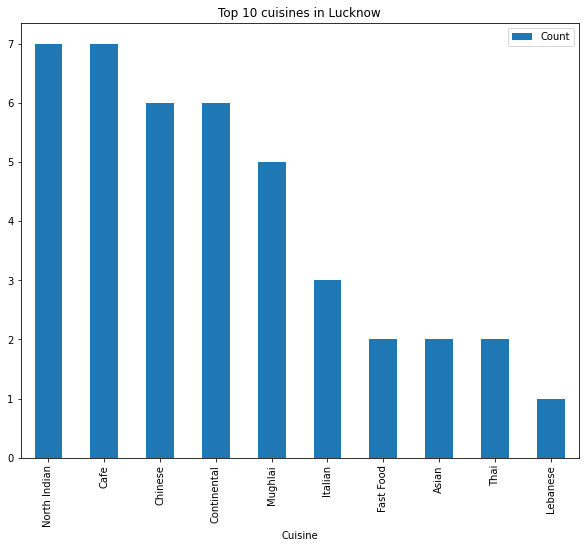

In [171]:
# Taking input for the city name
city_name = input("Enter a city name to get top 10 cuisines: ")

df_city = df1[df1['City'] == city_name]
# df_city.head()

lst = []
for j in df_city['Cuisines']:
    l1 = (j.split(','))
    for i in l1:
        lst.append(i.strip())
# lst

# Converting to Pandas Series
city_cuisines = pd.Series(lst)
city_cuisines_df = city_cuisines.value_counts().reset_index()
city_cuisines_df.columns = ['Cuisine','Count']
# city_cuisines_df.head(10)
plt.rcParams['figure.figsize']=(10,8)
city_cuisines_df.head(10).plot(kind = 'bar', x='Cuisine', y= 'Count')
plt.title("Top 10 cuisines in {}".format(city_name))

## h.	What is the maximum and minimum no. of cuisines that a restaurant serves? Also, what is the relationship between No. of cuisines served and Ratings

In [176]:
def cuisines_cnt(cus):
    return(len(cus.split(',')))

In [178]:
df1['Cuisines_count'] = df1['Cuisines'].apply(lambda x: cuisines_cnt(x))
df1.head()

C:\Users\S.Joshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines_count
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,2
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,3
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,2
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,1
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,2


In [179]:
# Maximum number of cuisines that a restaurant serves
df1['Cuisines_count'].max()

8

In [180]:
# Minimum number of cuisines that a restaurant serves
df1['Cuisines_count'].min()

1

## i. Discuss the cost vs the other variables.

In [122]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [125]:
data['Price range'].unique()

array([3, 2, 4, 1], dtype=int64)

In [126]:
# Taking mean of average cost for 2 for each city
data.groupby('City')['Average Cost for two'].mean()

City
Abu Dhabi           182.000000
Agra               1065.000000
Ahmedabad           857.142857
Albany               19.750000
Allahabad           517.500000
                      ...     
Weirton              25.000000
Wellington City      71.250000
Winchester Bay       25.000000
Yorkton              25.000000
€¡stanbul            81.428571
Name: Average Cost for two, Length: 141, dtype: float64

## j. Factors effecting ratings

In [144]:
data['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64